In [1]:
import os
if os.getcwd().endswith("experiments"):
    os.chdir("..")

os.getcwd()

'/home/lars/code/python/context-aware-flow-matching'

In [2]:
import torch
from torch.utils.data import random_split

import matplotlib.pyplot as plt

from lightning import seed_everything

from lightning_trainable.utils import find_checkpoint

from src.datasets import ContextAwareFlowMatchingDataset as CAFMDataset, ModelNet10Dataset
from src.models import Model
import src.visualization as viz

In [3]:
torch.autograd.set_grad_enabled(False)

In [4]:
seed_everything(42)

Seed set to 42


42

In [5]:
dataset = ModelNet10Dataset("data/modelnet10")

Found non-empty ModelNet10Dataset in data/modelnet10, skipping download...


Pre-Loading Meshes: 100%|██████████| 4899/4899 [00:50<00:00, 97.08it/s] 


In [6]:
train_data, val_data, test_data = random_split(dataset, [0.8, 0.1, 0.1])

In [7]:
cp = find_checkpoint(version=2)
model = Model.load_from_checkpoint(cp, map_location="cuda:0")
model.train_data = CAFMDataset(train_data, model.hparams.subset_size)
model.val_data = CAFMDataset(val_data, model.hparams.subset_size)
model.test_data = CAFMDataset(test_data, model.hparams.subset_size)
model = model.eval()
cp

#Layers in Encoder: 45
#Layers in Flow: 13


'lightning_logs/version_2/checkpoints/last.ckpt'

In [8]:
shapes = 18
layout = (3, 6)
points = 2048

use_blender = False

In [9]:
samples = torch.stack([model.val_data[i][1] for i in torch.randperm(len(model.val_data))[:shapes]])
torch.save(samples, "samples/data_samples.pt")

In [10]:
samples = torch.load("samples/data_samples.pt", map_location="cpu").numpy()

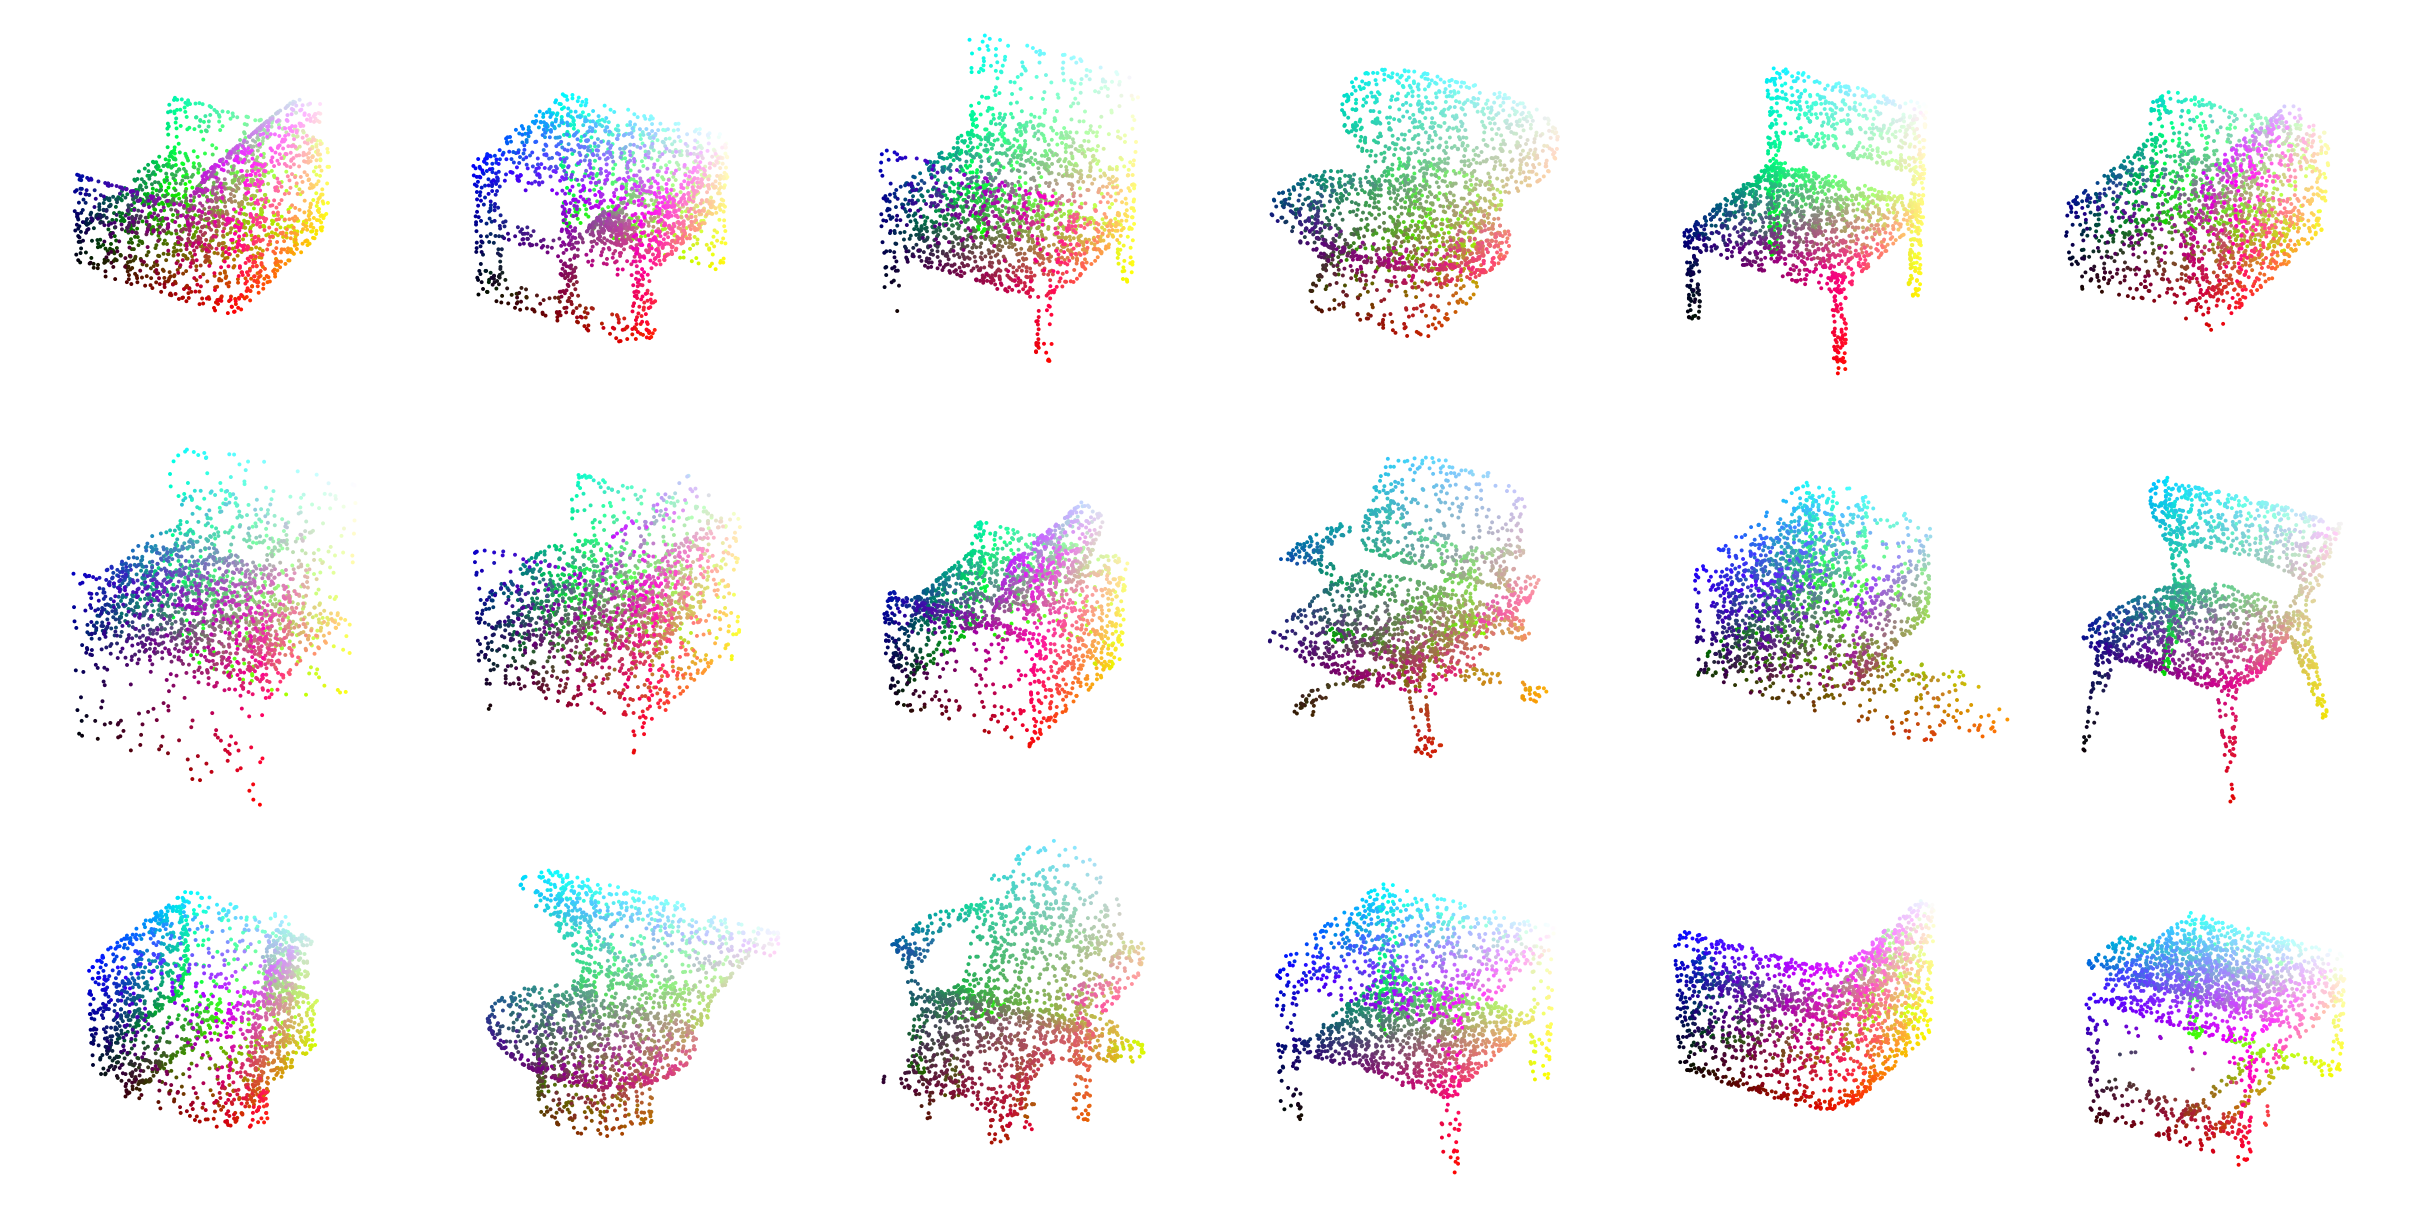

In [11]:
if use_blender:
    viz.multiscatter_bp(samples, layout=layout)
else:
    viz.multiscatter(samples, layout=layout)

plt.savefig("figures/data_samples.png", dpi=100, bbox_inches="tight")

In [9]:
samples = torch.load("samples/data_samples.pt", map_location=model.device)
samples = model.reconstruct(samples, integrator="rk45", steps=1000, progress=True)
torch.save(samples, "samples/reconstructions.pt")

1    


In [10]:
samples = torch.load("samples/reconstructions.pt", map_location="cpu").numpy()

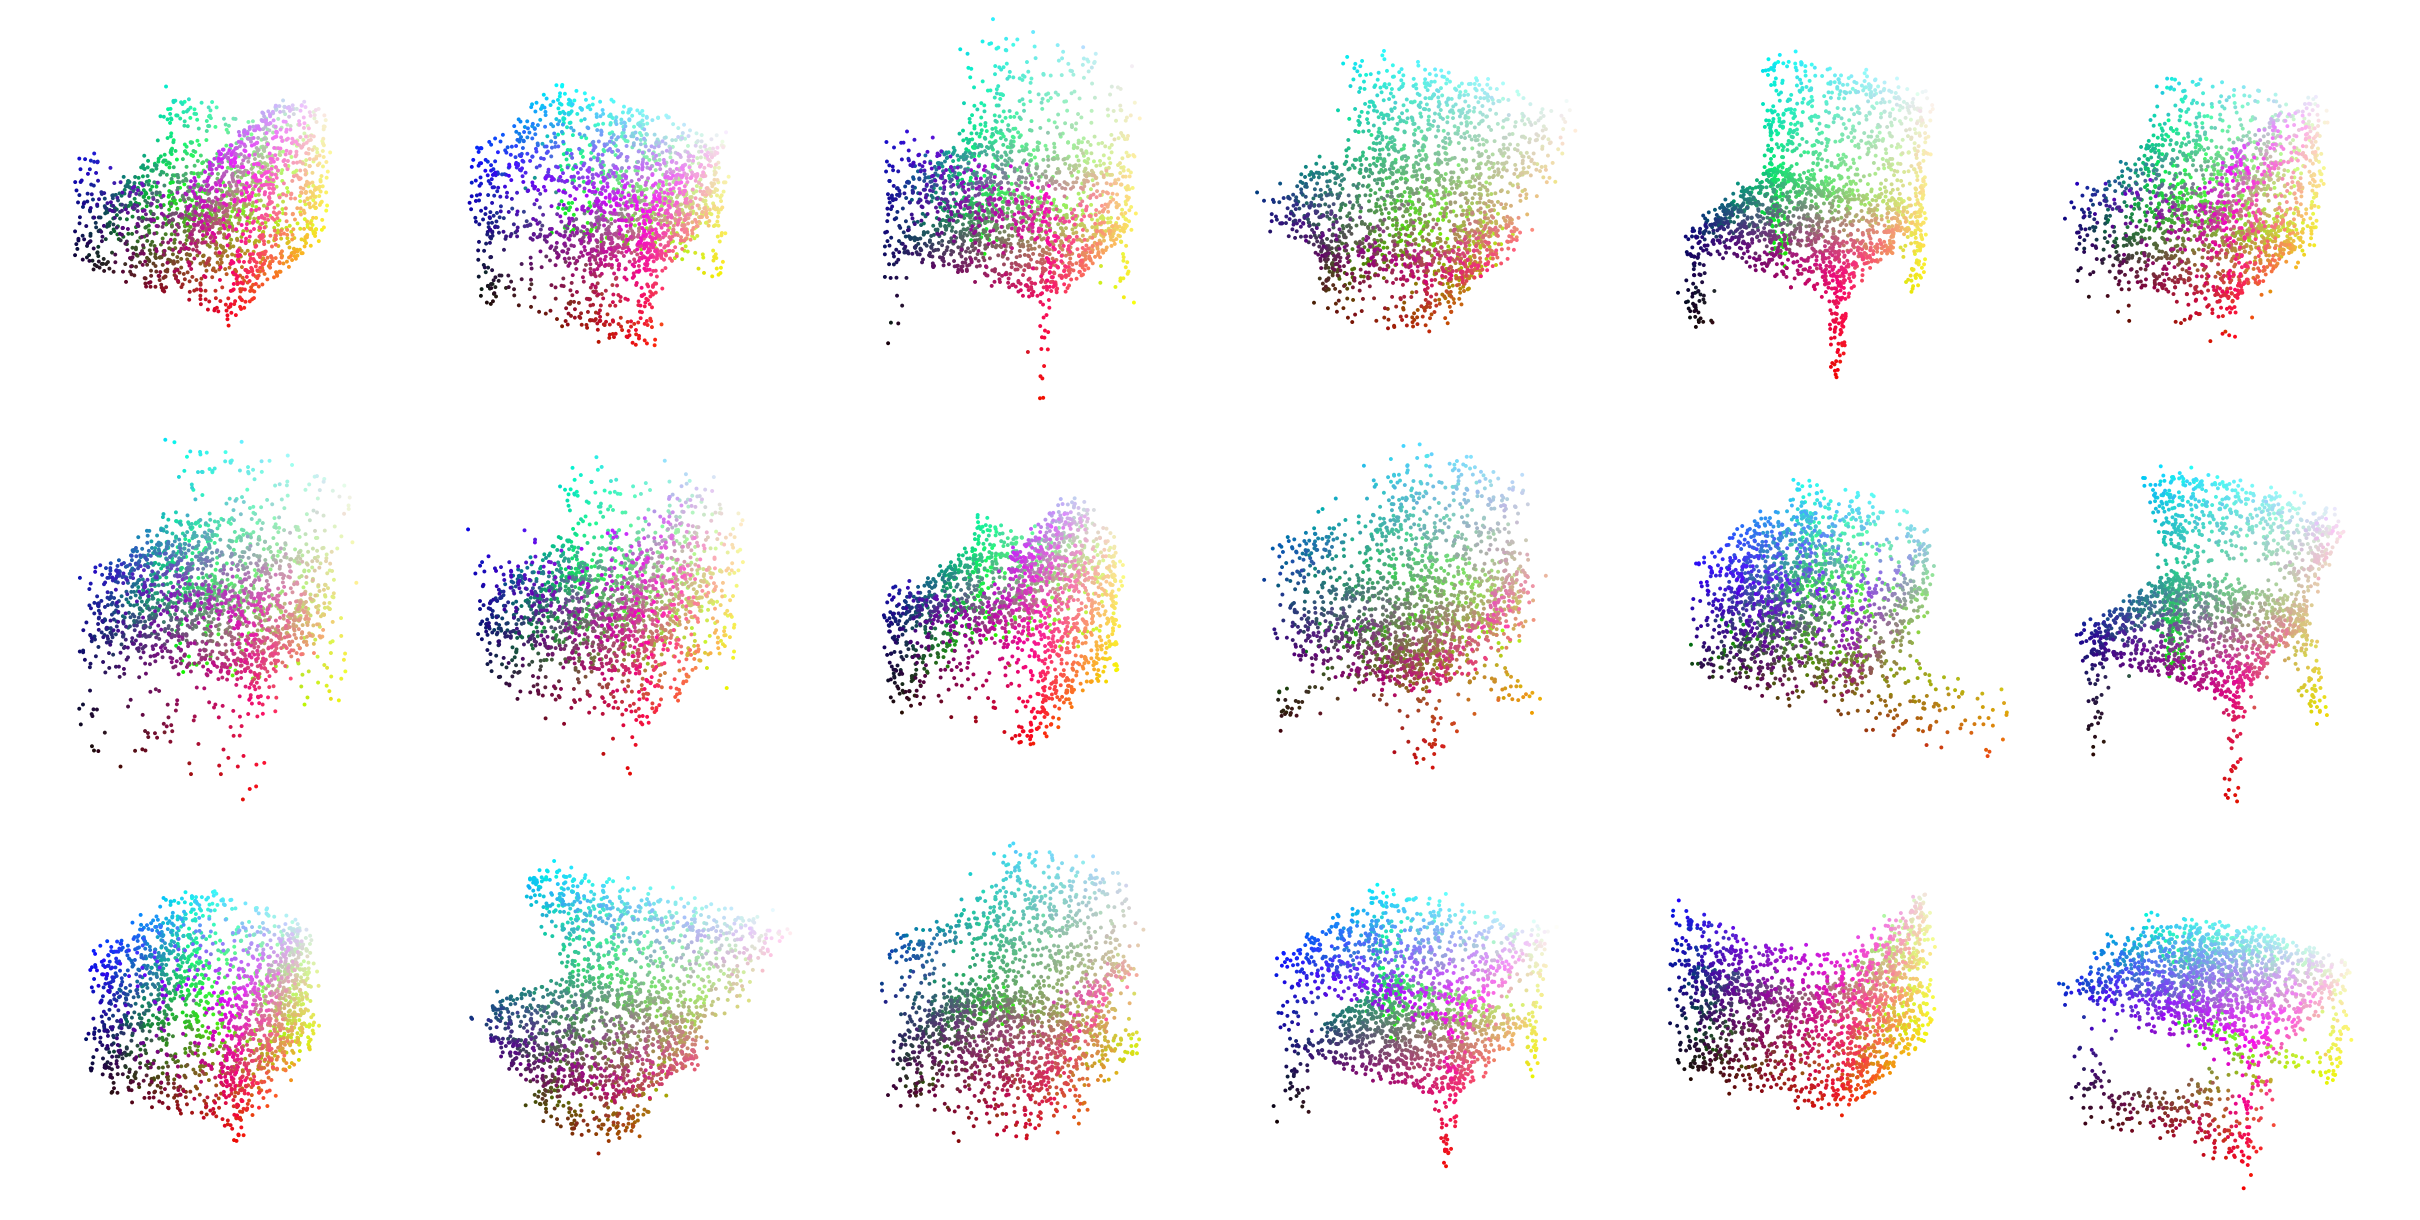

In [11]:
if use_blender:
    viz.multiscatter_bp(samples, layout=layout)
else:
    viz.multiscatter(samples, layout=layout)

plt.savefig("figures/reconstructions.png", dpi=100, bbox_inches="tight")